In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d sdolezel/black-friday

Dataset URL: https://www.kaggle.com/datasets/sdolezel/black-friday
License(s): unknown
 93% 7.00M/7.51M [00:01<00:00, 10.5MB/s]
100% 7.51M/7.51M [00:01<00:00, 6.91MB/s]


In [4]:
!unzip /content/black-friday.zip

Archive:  /content/black-friday.zip
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
df_train=pd.read_csv('/content/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
##  import the test data
df_test=pd.read_csv('/content/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.columns.values

array(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


# **handling missing values**

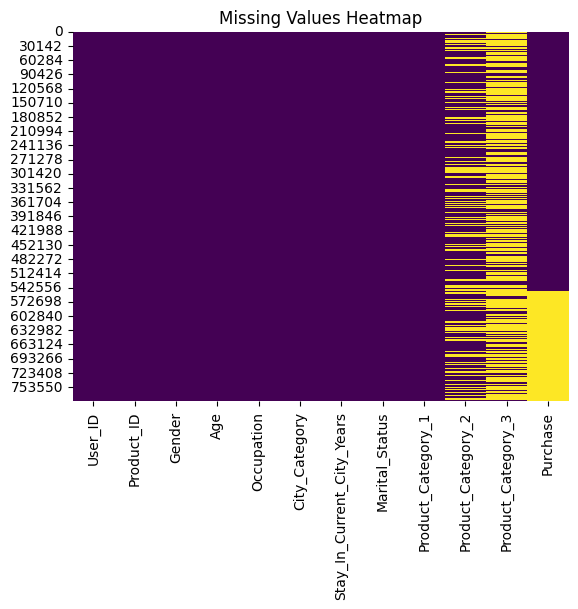

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
# Impute missing values in Product_Category_2 with the mode
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)

# Impute missing values in Product_Category_3 with the mode
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace=True)

# Impute missing values in Purchase with the median
df['Purchase'].fillna(df['Purchase'].median(), inplace=True)

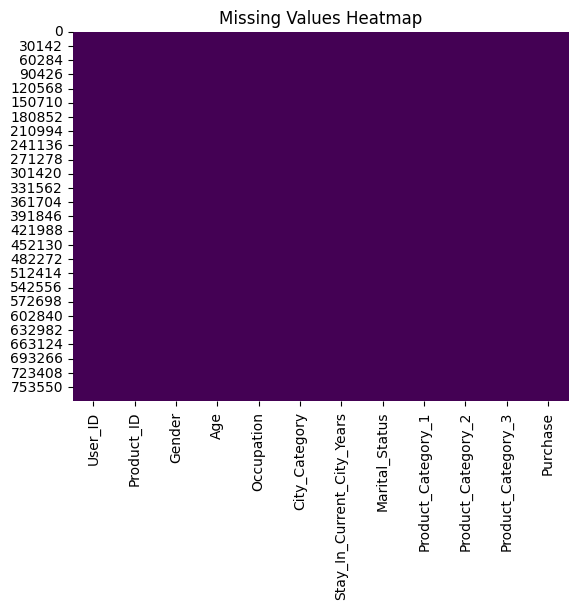

In [13]:
# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [14]:
df = df.drop(columns = ['User_ID'])

## **Inferences**

What is the distribution of numerical feature values across the samples?

**Inferences:**

- The Occupation column, which appears to be an integer representing different job roles, has a broad range and high variability. The mean is towards the middle of the range, indicating a somewhat balanced distribution. However, the high standard deviation suggests a significant spread in occupation types.
- This binary column indicates marital status, with 0 typically representing "Not Married" and 1 representing "Married." The mean suggests that approximately 41% of the individuals are married, and the relatively high standard deviation reflects the balanced distribution of the binary values.
- Product_Category_1 represents different product categories. The mean value of around 5.37 indicates that products from middle categories are more common, with a broad range of categories being represented. The high standard deviation shows significant variation in the types of products.
-  Similar to Product_Category_1, this column also shows a mean around the middle of the range. The standard deviation is somewhat smaller compared to Product_Category_1, suggesting less variability in the product categories. This might indicate that some categories are more prevalent or consistently chosen.
- With the mean closer to the higher end of the range, Product_Category_3 seems to indicate a preference for higher-numbered categories. The smaller standard deviation suggests that these categories are more consistently chosen.
- The Purchase column shows a wide range in purchase amounts with a mean of 8901.21. The high standard deviation indicates a large variance in purchase amounts, meaning that while some purchases are relatively low, others can be quite high.

In [15]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000
mean,8.079300,0.409777,5.366196,9.265541,14.988858,8901.209181
std,6.522206,0.491793,3.878160,4.301427,2.740792,4244.999808
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,8.000000,16.000000,6996.000000
50%,7.000000,0.000000,5.000000,8.000000,16.000000,8047.000000
75%,14.000000,1.000000,8.000000,14.000000,16.000000,9927.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### **Visualizing Numerical Data**

1. **Histograms**

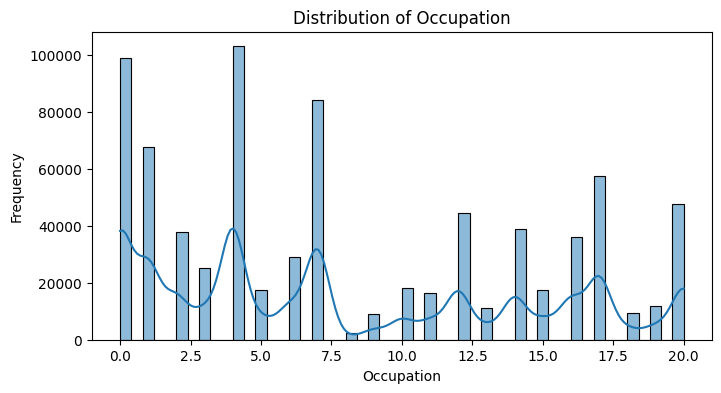

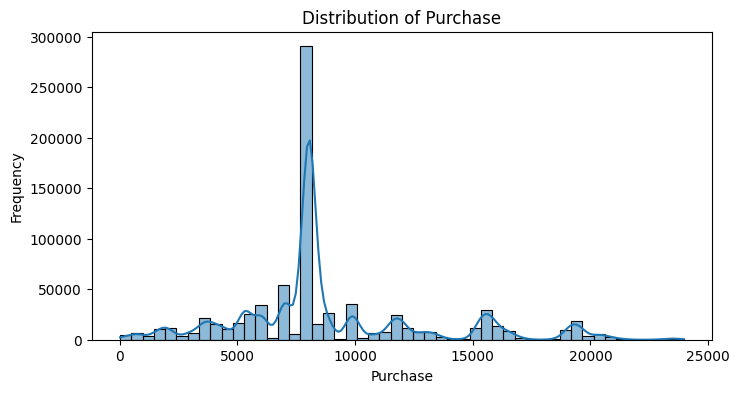

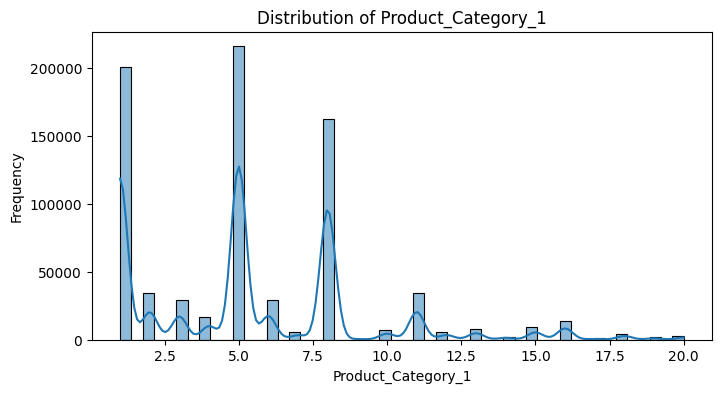

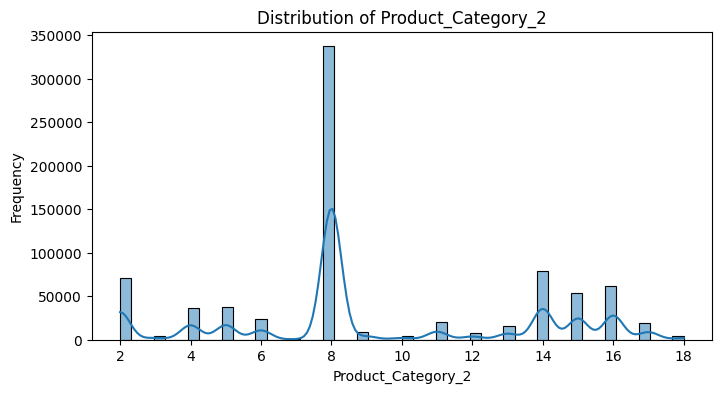

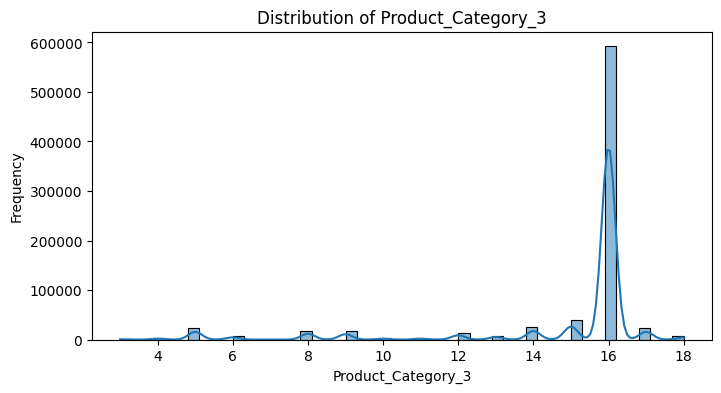

In [16]:
# Define a small figure size for clarity
figsize = (8, 4)

# Plot histograms for numerical columns
numerical_columns = ['Occupation', 'Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

for column in numerical_columns:
    plt.figure(figsize=figsize)
    sns.histplot(df[column].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

2. **Box Plots**

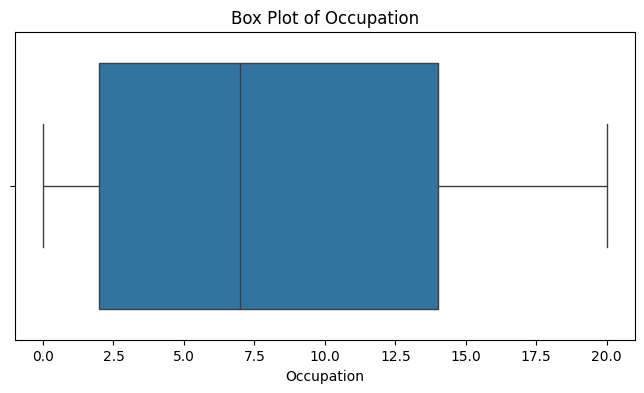

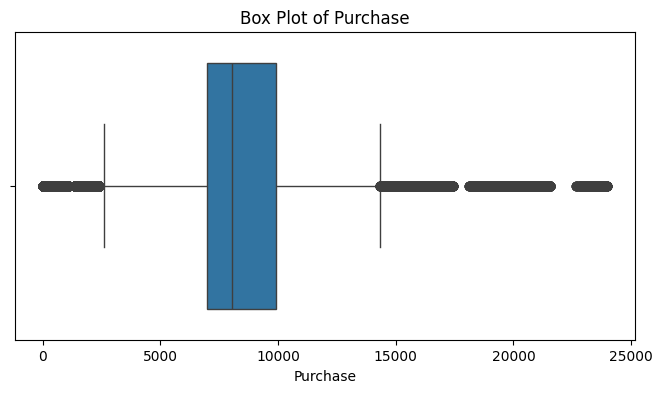

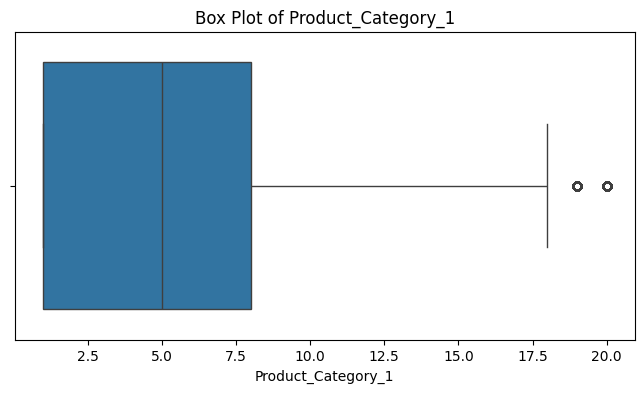

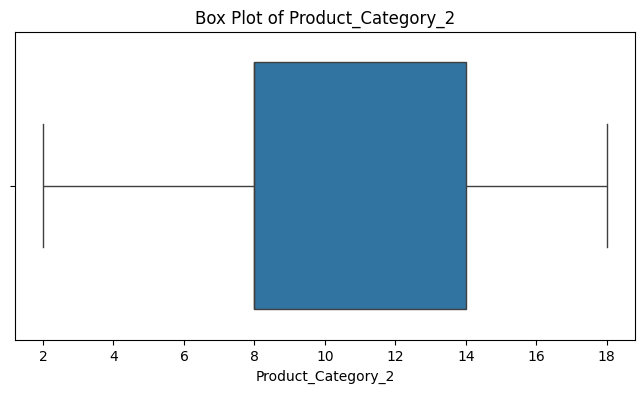

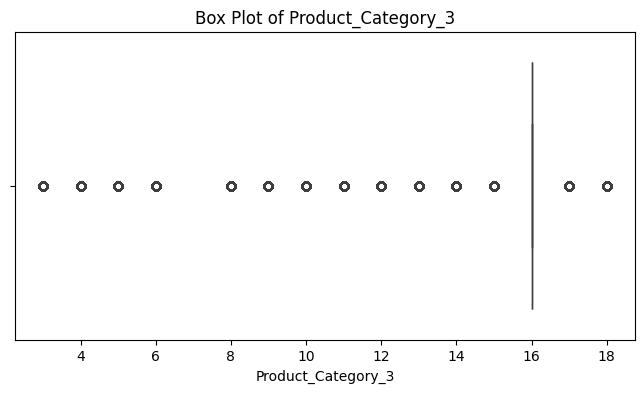

In [17]:
# Plot box plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=figsize)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

3. **Pair Plots**

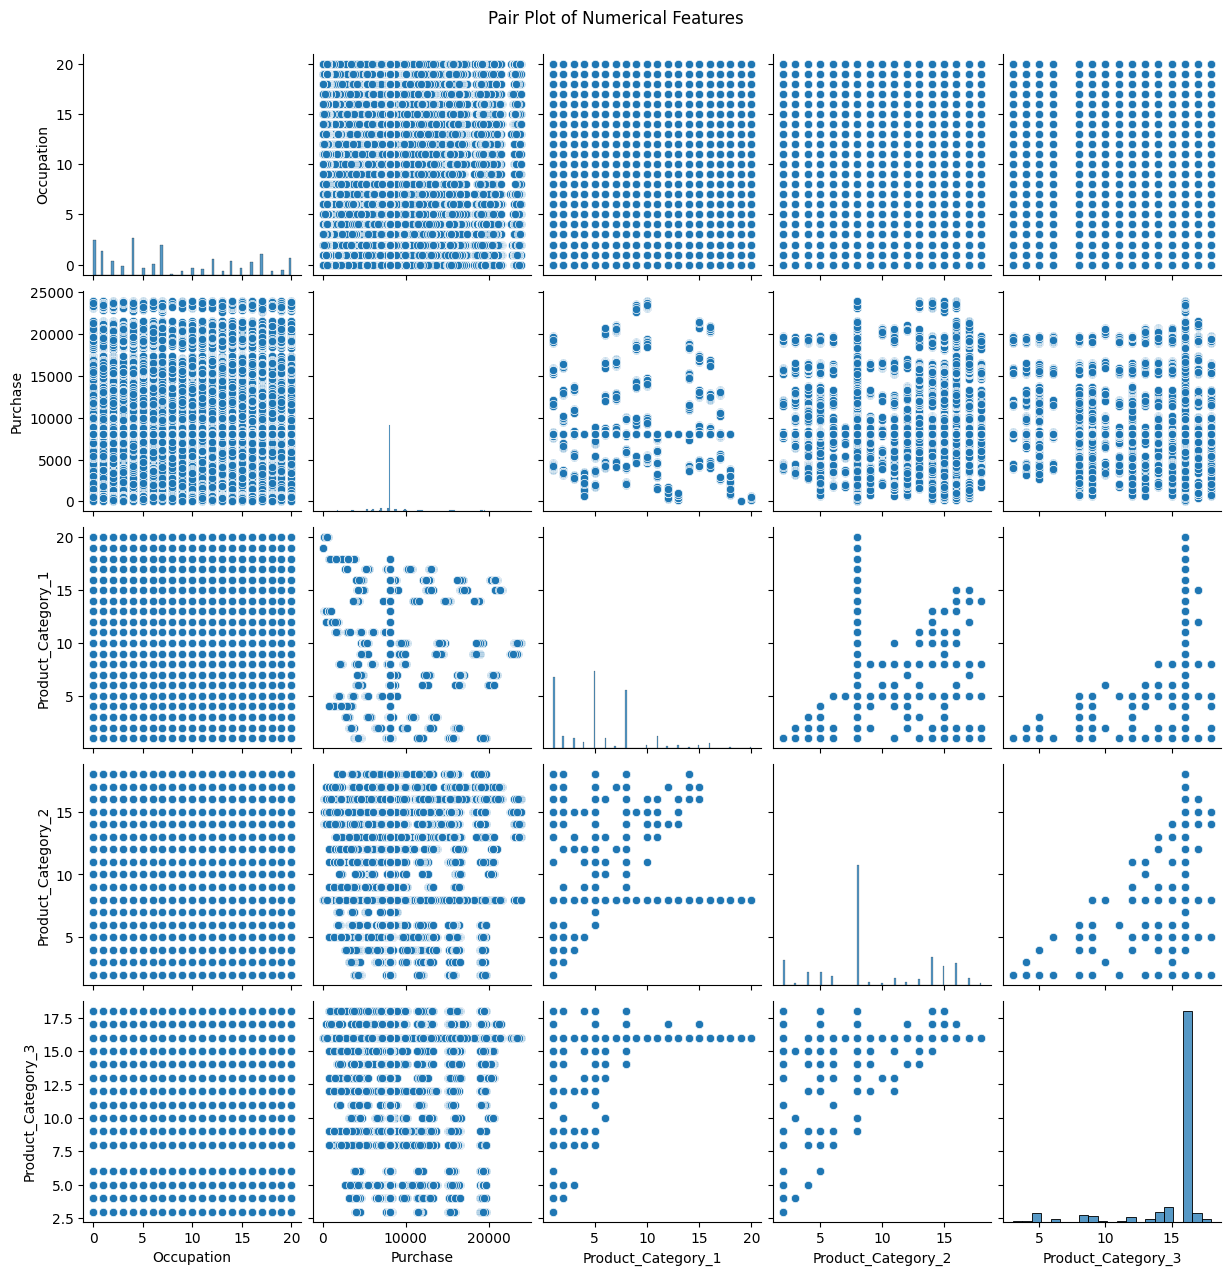

In [18]:
# Pair plot for numerical features
numerical_df = df[numerical_columns].dropna()
sns.pairplot(numerical_df)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

4. **Correlation Heatmap**

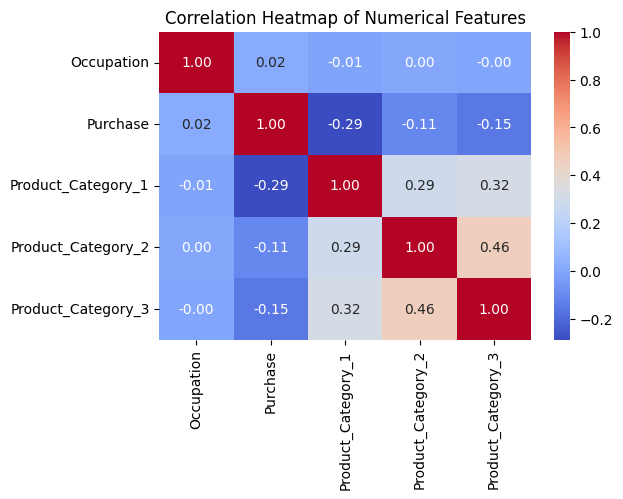

In [19]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

What is the distribution of categorical features?

**Inferences:**
- The dataset is heavily skewed towards males, with a large majority of entries being M. This imbalance might need to be addressed depending on the analysis or modeling
- The age groups are relatively evenly distributed, but 26-35 is the most common age group.
- The dataset contains three city categories, with B being the most common. This indicates that a substantial portion of the data comes from this category, which might impact city-based analyses.
- The majority of individuals have stayed in their current city for 1 year. This could suggest a tendency for recent movers or people with shorter stays.

In [20]:
df.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,783667,783667,783667,783667,783667
unique,3677,2,7,3,5
top,P00265242,M,26-35,B,1
freq,2709,590031,313015,329739,276425


### **Visualizing Categorical Data**

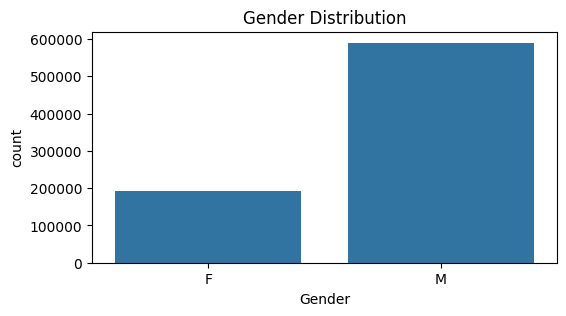

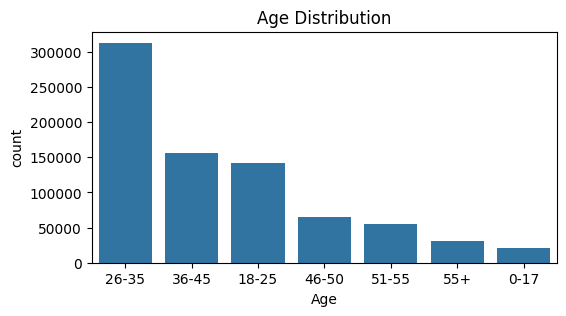

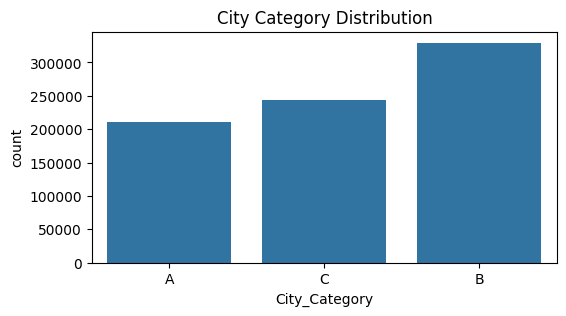

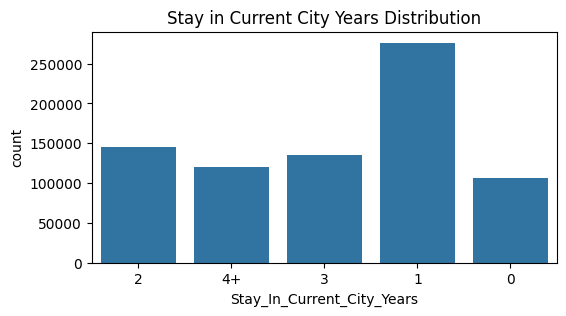

In [21]:
# Plot for Gender
plt.figure(figsize=(6, 3))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Plot for Age
plt.figure(figsize=(6, 3))
sns.countplot(x='Age', data=df, order=df['Age'].value_counts().index)
plt.title('Age Distribution')
plt.show()

# Plot for City_Category
plt.figure(figsize=(6, 3))
sns.countplot(x='City_Category', data=df)
plt.title('City Category Distribution')
plt.show()

# Plot for Stay_In_Current_City_Years
plt.figure(figsize=(6, 3))
sns.countplot(x='Stay_In_Current_City_Years', data=df)
plt.title('Stay in Current City Years Distribution')
plt.show()

# **Correlating**

## Most Useful Features for Predicting Purchase Amounts:

- **Age**: Older age groups generally have higher purchases, making this a significant predictor.
- **City_Category**: The category of the city strongly influences the purchase amount, with Category C showing the highest values.
- **Gender**: Males tend to have higher purchases on average, which could be useful in predicting higher values.

## Less Influential Feature:

- **Stay_In_Current_City_Years**: While it shows some variability, its influence on the purchase amount is less pronounced compared to age and city category.

In [22]:
# Group by categorical columns and calculate the mean purchase amount
categorical_columns = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for column in categorical_columns:
    print(df[[column, 'Purchase']].groupby([column], as_index=False).mean().sort_values(by='Purchase', ascending=False))
    print('-'*50)

  Gender     Purchase
1      M  9023.284173
0      F  8529.232741
--------------------------------------------------
     Age     Purchase
5  51-55  9092.599025
6    55+  8953.657739
3  36-45  8948.554791
2  26-35  8892.818855
4  46-50  8860.251877
1  18-25  8835.180982
0   0-17  8674.514250
--------------------------------------------------
  City_Category     Purchase
2             C  9222.137682
1             B  8821.201638
0             A  8654.716848
--------------------------------------------------
  Stay_In_Current_City_Years     Purchase
2                          2  8938.743246
3                          3  8919.376938
4                         4+  8909.628701
1                          1  8890.610187
0                          0  8844.405530
--------------------------------------------------


# **Handling Imabalanced Age column**

a. Oversampling

In [7]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df[df['Gender'] == 'M']
df_minority = df[df['Gender'] == 'F']

# Oversample the minority class
df_minority_oversampled = resample(df_minority,
                                   replace=True,     # Sample with replacement
                                   n_samples=len(df_majority),    # Match number in majority class
                                   random_state=42) # For reproducibility

# Combine the majority and oversampled minority class
df_balanced = pd.concat([df_majority, df_minority_oversampled])

print(df_balanced['Gender'].value_counts())

Gender
M    590031
F    590031
Name: count, dtype: int64


b. Undersampling

In [8]:
# Undersample the majority class
df_majority_undersampled = resample(df_majority,
                                    replace=False,    # Sample without replacement
                                    n_samples=len(df_minority),    # Match number in minority class
                                    random_state=42) # For reproducibility

# Combine the undersampled majority class with minority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

print(df_balanced['Gender'].value_counts())

Gender
M    193636
F    193636
Name: count, dtype: int64


c. SMOTE

# **Encoding Categorical Columns**

Ordinal columns

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
categorical_features = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [11]:
# Label Encoding for ordinal features if needed
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature].astype(str))
    label_encoders[feature] = le

In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969.0


non-ordinal columns

In [13]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'])

In [30]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969.0


In [31]:
print(df.dtypes)

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object


# **Split Data**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import gc

# Assume df is your DataFrame
X = df.drop(['Purchase', 'Product_ID'], axis=1)
y = df['Purchase']

# Downcast numeric data types to save memory
X = X.apply(pd.to_numeric, downcast='float')

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Explicitly delete the original DataFrame to free up memory
del df
gc.collect()  # Force garbage collection to free memory

# **Model Initialization and Training**

In [ ]:
# Initialize the model
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

In [16]:
# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

# **Evaluate the Model**

In [17]:
# Predict on the test set
y_pred = model.predict(X_test)

Calculate Metrics

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score: {r2}")

Mean Absolute Error (MAE): 2397.482770720071
Mean Squared Error (MSE): 9818206.946042636
Root Mean Squared Error (RMSE): 3133.4018168825137
R-squared (R²) Score: 0.45459215123559893


**Visualize the Results**

**Scatter plot**
- This scatter plot visually compares the model's predicted purchase amounts to the actual purchase amounts, where points closely aligned along the diagonal indicate accurate predictions.

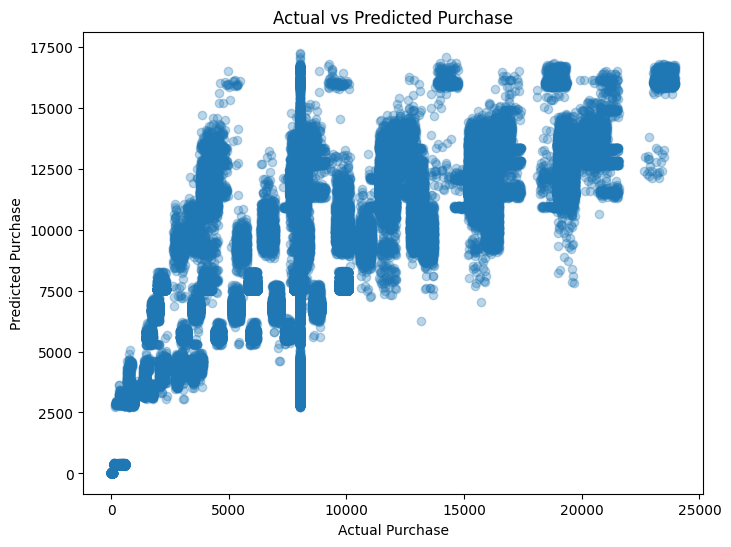

In [19]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Purchase")
plt.ylabel("Predicted Purchase")
plt.title("Actual vs Predicted Purchase")
plt.show()

**Residual Plot**

- A residual plot shows the difference between actual and predicted values. Ideally, the residuals (errors) should be randomly distributed around zero.

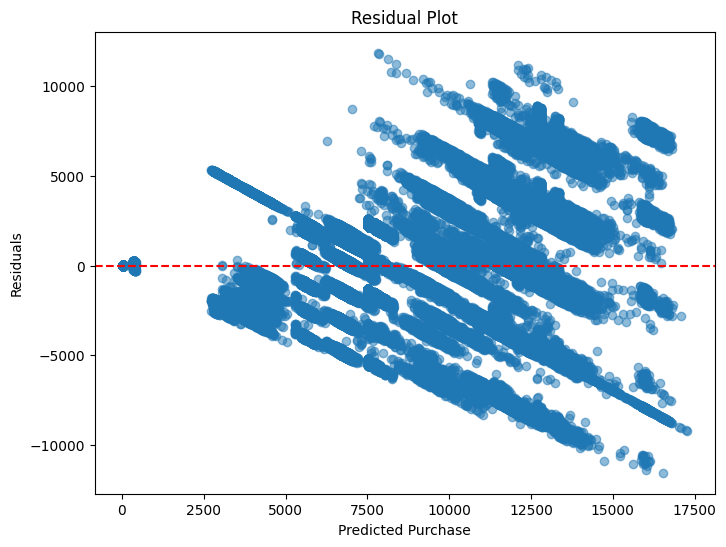

In [22]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Purchase")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Distribution of Errors**

- Visualize the distribution of prediction errors (residuals) to check for normality, which is an assumption in many regression models.

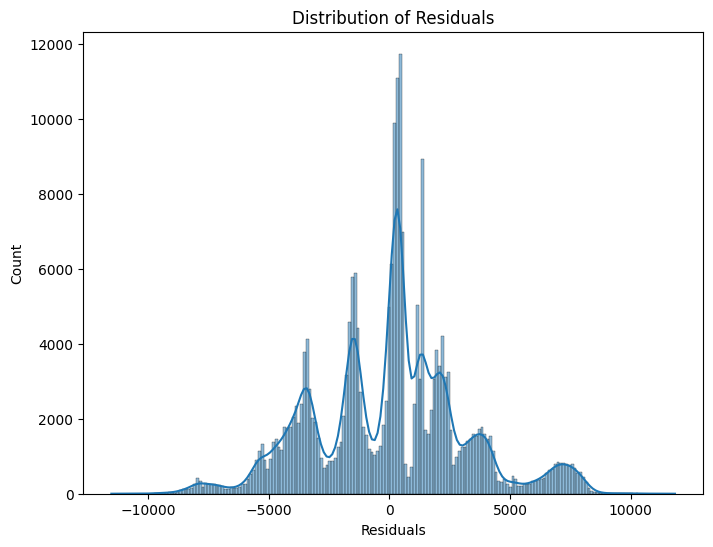

In [23]:
import seaborn as sns

# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

**Q-Q Plot**

- A Q-Q (quantile-quantile) plot compares the residuals' distribution with a normal distribution. This can be useful to check if the residuals are normally distributed.

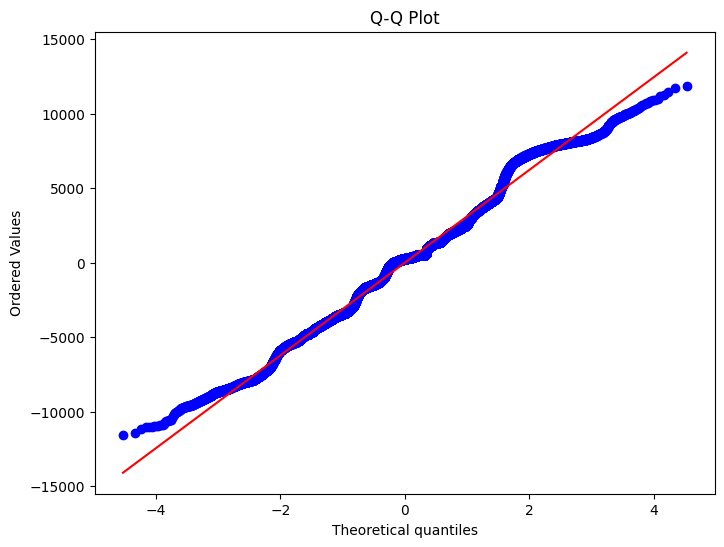

In [24]:
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

Check Feature Importance

                      Feature  Importance
7          Product_Category_1    0.954230
8          Product_Category_2    0.011572
9          Product_Category_3    0.009998
0                     User_ID    0.009946
4               City_Category    0.004792
3                  Occupation    0.003536
2                         Age    0.002897
5  Stay_In_Current_City_Years    0.001706
1                      Gender    0.000818
6              Marital_Status    0.000506


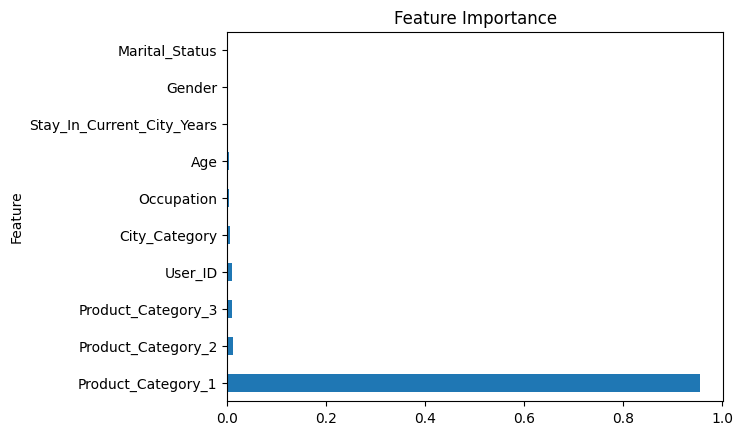

In [20]:
# Get feature importance
importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Optionally plot feature importance
feature_importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Feature Importance")
plt.show()

Cross-Validation

In [21]:
from sklearn.model_selection import cross_val_score

# Cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {np.mean(cv_scores)}")

Cross-Validation R² Scores: [0.54521966 0.54690971 0.54533788 0.28637653 0.        ]
Mean R² Score: 0.3847687562654091
